# [실습] 단변량분석 종합실습

## 0.환경준비

In [212]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 숫자형 변수

## 보스톤 집값 데이터

![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn2	|	25,000 평방피트를 초과 거주지역 비율 (범주: 0-하, 1-중, 2-상)	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


- 'medv' 변수가 y(=Target variable)

In [213]:
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


### ① crim

In [214]:
var= 'crim'

1) 변수의 비즈니스 의미

> 타운별 범죄율

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [216]:
boston[var].isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [217]:
boston[var].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

5) 분포 확인(시각화)

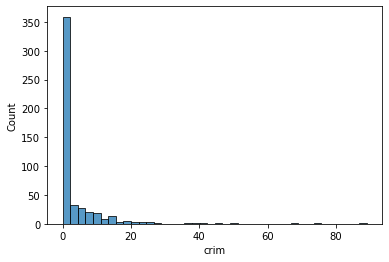

In [218]:
# histplot으로 분포확인

import seaborn as sns

sns.histplot(boston[var], bins = 40)
plt.show()

- boxplot을 저장하면 

→ 딕셔너리로 나온다  
→ 위아래 수염의 max와 min 값들을 얻어낼 수 있다.

- Boxplot

min  
1사분위수 = 25%  
2사분위수 = 50% = 중위값(=Median)  
3사분위수 = 75%  
max  

IQR(=Inter Quartile Range) = 3사분위수 - 1사분위수  
아래쪽 수염(whisker) : min과 (1사분위수 - 1.5 * IQR)를 비교해서 큰 값  
위쪽 수염(whisker) : max와 (3사분위수 + 1.5 * IQR)를 비교해서 작은값

[0.082045 0.00632 ]
[3.6770825 8.98296  ]


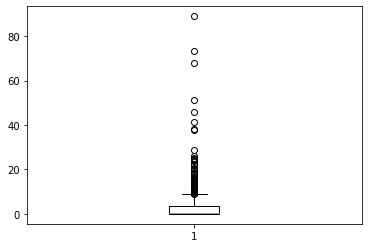

In [184]:
# boxplot으로 분포확인

box = plt.boxplot(boston[var], vert = True) # 디폴트값(=boxplot 세로) : vert = True

print(box['whiskers'][0].get_ydata()) # 아래쪽 수염의 max. min
print(box['whiskers'][1].get_ydata()) # 위쪽 수염의 min, max

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 대부분(75%의 타운)의 범죄율이 3.6% 이하  
* boxlplot 기준으로 볼 때, 약 9% 이상은 이상치로 검토
* 대부분의 타운은 치안 관리가 잘 되는 것 같으나, 9% 이상의 범죄율 지역은 치안상태, 외곽지역, 슬럼가/빈곤층 밀집 지역 등인지 확인이 필요하다.

7) 추가 분석해 볼 사항이 있나요?

> * 범죄율을 9% 이상과 이하로 나누고(범주화), 이상인 지역과 이하의 지역에 대한 다른 변수의 차이를 비교해 본다.

### ② ptratio

In [219]:
var = 'ptratio'

1) 변수의 비즈니스 의미

> 교사 1명 당 학생 비율

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [220]:
boston[var].isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [221]:
boston[var].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

5) 분포 확인(시각화)

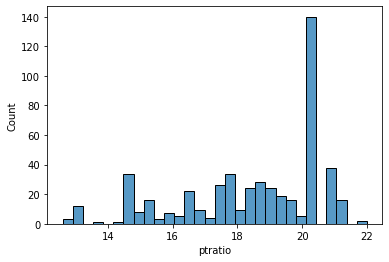

In [222]:
# histplot으로 분포확인

sns.histplot(boston[var], bins = 30)
plt.show()

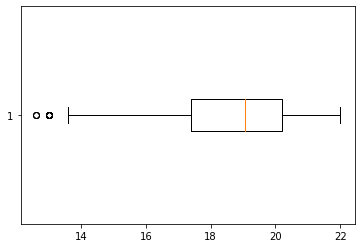

13.6
22.0


In [223]:
# boxplot으로 분포확인

box = plt.boxplot(boston[var], vert = False) # boxplot 가로 : vert = False
plt.show()

print(box['whiskers'][0].get_xdata()[1]) # 아래쪽 수염
print(box['whiskers'][1].get_xdata()[1]) # 위쪽 수염

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 분포가 퍼져있음
- 20%에 타운이 몰려 있는 것으로 보아, 교사학생 비율에 대한 정책적인 기준이 있는 것으로 판단?

7) 추가 분석해 볼 사항이 있나요?

> 20%이상과 미만의 범주로 나누고 분석을 통해 살펴볼 필요가 있다.
- 교사학생비율에 따른 집값의 차이는?

### ③ lstat

In [224]:
var = 'lstat'

1) 변수의 비즈니스 의미

> 인구 중 하위 계층 비율

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [225]:
boston[var].isnull().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [226]:
boston[var].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

5) 분포 확인(시각화)

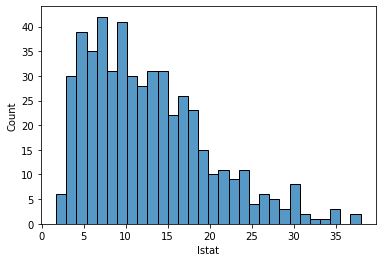

In [227]:
# histplot으로 분포확인

sns.histplot(boston[var], bins = 30)
plt.show()

1.73
30.81


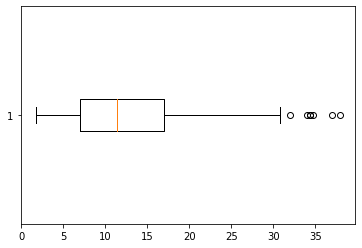

In [228]:
# boxplot으로 분포확인

box = plt.boxplot(boston[var], vert = False) # boxplot 가로 : vert = False

print(box['whiskers'][0].get_xdata()[1]) # 아래쪽 수염
print(box['whiskers'][1].get_xdata()[1]) # 위쪽 수염

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 2사분위수는 1사분위수의 약 2배이다  
- 지역에 따른 일자리가 없어서 하층민이 있는 것은 아닐까?  
- 일자리와 하층민의 상관관계를 살펴보면 어떨까?

> - 분포가 안쪽으로 치우침
- 5~15%에 대부분이 물려 있음
- boxplot 기준으로 30% 이상은 도시 외곽, 슬럼가 등이 아닐까 확인 필요

7) 추가 분석해 볼 사항이 있나요?

**인구 중 하위 계층 비율**을 나타내는 lstat 변수와 **범죄율**을 나타내는 변수의 상관관계가 궁금하다

### ④ medv

In [229]:
var = 'medv'

1) 변수의 비즈니스 의미

> 타운별 집값(중위수) & Target Variable

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [230]:
boston[var].isnull().sum()

0

> NaN은 존재하지 않음  
당연히 Target은 결측값(NaN, None)이 없다

4) 기초통계량(수치화)

In [231]:
boston[var].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

5) 분포 확인(시각화)

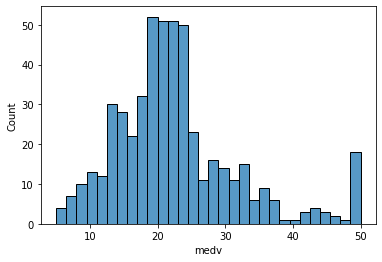

In [232]:
# histplot으로 분포확인

sns.histplot(boston[var], bins = 30)
plt.show()

아래쪽 수염 : 5.6
위쪽 수염 : 36.5


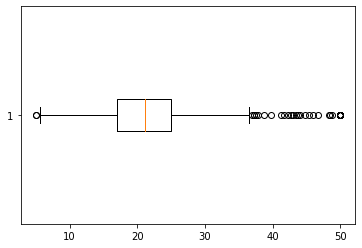

In [237]:
# boxplot으로 분포확인

box = plt.boxplot(boston[var], vert = False) # boxplot 가로 : vert = False

print('아래쪽 수염 : {}'.format(box['whiskers'][0].get_xdata()[1])) # 아래쪽 수염
print('위쪽 수염 : {}'.format(box['whiskers'][1].get_xdata()[1])) # 위쪽 수염

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 4만달러 이상과 이후로 분포가 구분됨.
* 5만달러에 타운들이 몰려 있음 --> 왜?
    * 집값 상한제?
    * 타운별 집값에서 집을 리모델링을 했더나 교통편이 편리해서 저렇게 비싸나? 유명인이 살았나?
    * 추후에 4만달러 미만과 이상으로 나눠서 부자라고 컬럼이름을 지어서 분석해볼까?
    * 이상치에 대한 데이터 전처리?

bar그래프를 보니 이상치가 있다
타운별 집값에서 집을 리모델링을 했더나 교통편이 편리해서 저렇게 비싸나? 유명인이 살았나?
추후에 4만달러 미만과 이상으로 나눠서 부자라고 컬럼이름을 지어서 분석해볼까?
타운별 집값분석을 할 때는 이상치를 어느정도 버리는게 전체적인 데이터를 반영할 수 있을 것 같다.

7) 추가 분석해 볼 사항이 있나요?

> * 4만달러 이상과 이후로 분포가 구분됨.
* 5만달러에 타운들이 몰려 있음 --> 왜?
    * 집값 상한제?
    * 이상치에 대한 데이터 전처리?

집값에 영향을 미치는 요인 말고
현재 사회적인 이슈를 크롤링하여 상관분석을 한 후 
사회적인 이슈가 얼만큼 집값에 반영이 되는지 살펴보고 싶다

# 범주형 변수

## 타이타닉 탑승객 데이터

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [238]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ① Survived

In [239]:
var = 'Survived'

1) 변수의 비즈니스 의미

> 탑승객의 생존여부

2) 숫자, 범주?

In [240]:
titanic[var].unique()

array([0, 1], dtype=int64)

> * 범주형 데이터
* 범주 종류 1, 0
    * 1: 생존
    * 0: 사망

3) NaN 존재 유무

In [242]:
titanic[var].isna().sum()

0

> NA 없음

4) 기초통계량(수치화)

In [243]:
print(titanic[var].value_counts())
print(titanic[var].value_counts()/ len(titanic[var]))

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


5) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


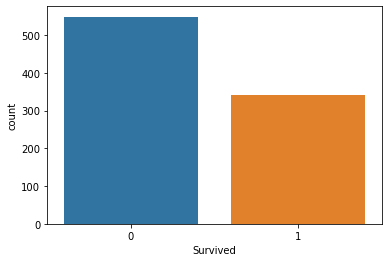

In [244]:
sns.countplot(titanic[var])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체 891명
* 생존자
    * 생존자의 수는 342명
    * 생존율 0.384
* 사망율이 높은 이유는 무엇일까?

7) 추가 분석해 볼 사항이 있나요?

> * Survived가 Target 이므로, feature들과 Target 과의 관계를 살펴보게 될 것.
* 그러므로 추가 분석하고자 하는 사항은 feature들을 살펴볼 때 도출하게 될 것이라 생각됨.

### ② Pclass	

In [245]:
var = 'Pclass'

1) 변수의 비즈니스 의미

> Ticket class

2) 숫자, 범주?

In [246]:
titanic[var].unique() # data가 저장된 순서로 나온거임

array([3, 1, 2], dtype=int64)

In [247]:
titanic[var].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

> * 범주형 데이터
* 범주 종류 1, 2, 3  
    * 1 : 1st
    * 2 : 2nd  
    * 3 : 3rd

3) NaN 존재 유무

In [248]:
titanic[var].isnull().sum()

0

> NA 없음

4) 기초통계량(수치화)

In [250]:
print(titanic[var].value_counts())
print(titanic[var].value_counts()/ len(titanic[var]))

3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


5) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


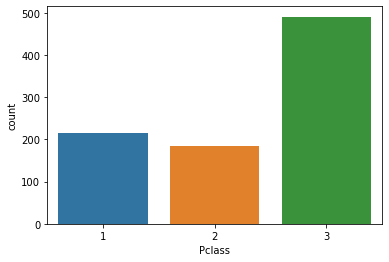

In [251]:
sns.countplot(titanic[var])
plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


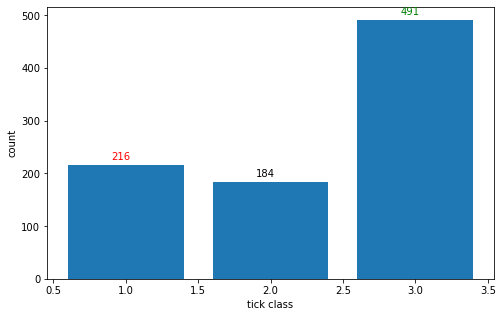

In [253]:
# 집계
cnt = titanic[var].value_counts()
print(cnt)

plt.figure(figsize = (8, 5))

plt.bar(cnt.index, cnt.values)
plt.text(cnt.index[0]-.1, cnt.values[0] + 10, cnt.values[0], color = 'green')
plt.text(cnt.index[1]-.1, cnt.values[1] + 10, cnt.values[1], color = 'red')
plt.text(cnt.index[2]-.1, cnt.values[2] + 10, cnt.values[2])

plt.xlabel('tick class')
plt.ylabel('count')

plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체 891명
* 객실등급 비율
    * 3 : 0.551066
    * 1 : 0.242424
    * 2 : 0.206510
* 탑승지역이 주로 2차산업혁명의 중심 도시 --> 아메리칸드림을 갖고 탑승한 노동자들이 주류 --> 3등급 객실에 주로 탑승
* 혹은, 원래 타이타닉호의 객실수는 정해져 있는것.

* 3등급 사람들이 많이 있는 것으로 보아  
3등급 객실이 많거나 3등급의 한 개의 객실에 여러사람을 2층~3층 침대로 배치했을 경우도 있지 않을까?

* 탑승지역이 주로 2차산업혁명의 중심도시 -> 아메리칸 드림을 갖고 탑승한 노동자들이 주류 -> 3등급 객실에 주로 탑승  
또는, 원래 타이타닉호의 객길수는 정해져 있는거?

7) 추가 분석해 볼 사항이 있나요?

- 객실 등급별 생존 여부
- 객실 등급, 탑승지역 비교

### ③ Sex

In [254]:
var = 'Sex'

1) 변수의 비즈니스 의미

> 성별

2) 숫자, 범주?

In [255]:
titanic[var].unique()

array(['male', 'female'], dtype=object)

> * 범주형 데이터
* 범주 종류 male, female  
    * male : 
    * female : 

3) NaN 존재 유무

In [259]:
titanic[var].isnull().sum()

0

4) 기초통계량(수치화)

In [260]:
print(titanic[var].value_counts())
print(titanic[var].value_counts()/ len(titanic[var]))

male      577
female    314
Name: Sex, dtype: int64
male      0.647587
female    0.352413
Name: Sex, dtype: float64


5) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


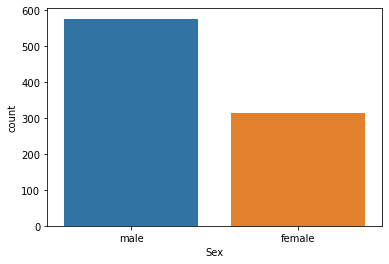

In [261]:
sns.countplot(titanic[var])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체 891명
* 범주 종류 male, female  
    * male : 
    * female : 

7) 추가 분석해 볼 사항이 있나요?

- 성별 별 생존여부?

### ④ Embarked

In [262]:
var = 'Embarked'

1) 변수의 비즈니스 의미

> 탑승객의 승선지역

2) 숫자, 범주?

In [263]:
titanic[var].unique()

array(['S', 'C', 'Q', nan], dtype=object)

> * 범주형 데이터
* 범주 종류
    * C : Cherbourg
    * Q : Queenstown
    * S : Southampton
    * nan : NaN 데이터가 있다는 의미!

3) NaN 존재 유무

In [265]:
print(titanic[var].isna().sum())
print(titanic[var].isna().sum()/len(titanic[var]))

2
0.002244668911335578


> * NA 2건, 0.22%
* 어떻게 조치를 하는것이 좋을까요?
    * 1) 삭제한다.
    * 2) 값을 채운다.
    * 3) 추정해서 넣는다.

4) 기초통계량(수치화)

In [266]:
print(titanic[var].value_counts())
print(titanic[var].value_counts()/ len(titanic[var]))

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64


5) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


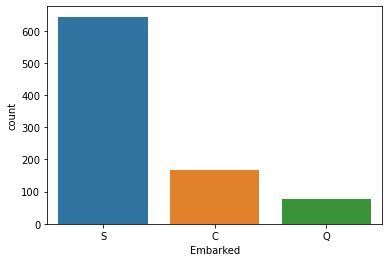

In [267]:
sns.countplot(titanic[var])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체 891명
* 탑승지 비율
    * Cherbourg : 0.188552
    * Queenstown : 0.086420
    * Southampton : 0.722783

7) 추가 분석해 볼 사항이 있나요?

> * 탑승지 별 생존 여부